# Homework 2

## Problem 1

### 1 

#### The probability of hitting the circle is given by:

$$\begin{equation} P_{in} = \frac{S_{circle}}{S_{square}} = \frac{\pi r^2}{4r^2} = \frac{\pi}{4}
\end{equation}$$

Expected value of S:
$$ m = 0 \cdot (1-\frac{\pi}{4}) + 4 \cdot \frac{\pi}{4} = \pi $$
$$ \Delta = \pi(4-\pi) $$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

m = pi
D = pi * (4 - pi)

print("True values for the distribution:")
print("m =", m)
print("D =", D)

True values for the distribution:
m = 3.141592653589793
D = 2.6967662132698145


### 2

 A) _UNBIASEDNESS OF THE MEAN ESTIMATOR_
    $$
    \langle \hat{m} \rangle = \frac{1}{N}\sum_i \langle S_i \rangle = \frac{N}{N} \langle S \rangle = \langle S \rangle
    $$
    
 B) _UNBIASEDNESS OF THE VARIANCE ESTIMATOR_
    $$
    \langle \hat{\Delta} \rangle = \frac{1}{N-1} \sum_i \langle S_i^2 \rangle - \langle \hat{m}^2 \rangle = \frac{N}{N-1} \langle S^2 \rangle - \frac{N}{N-1}\langle \hat{m}^2 \rangle
    $$
    Let us compute $\langle \hat{m}^2 \rangle$ first.
    $$
    \begin{equation}
    \begin{split}
    \langle \hat{m}^2 \rangle & = \frac{1}{N^2}\sum_{i, j} \langle S_i S_j \rangle \\
        & = \frac{1}{N^2}\sum_{i=j} \langle S_i^2 \rangle + \frac{1}{N^2}\sum_{i \neq j} \langle S_i S_j \rangle \\
        & = \frac{1}{N}\langle S^2 \rangle + \frac{1}{N^2}\sum_{i \neq j} \langle S_i \rangle \langle S_j \rangle \\
        & = \frac{1}{N}\langle S^2 \rangle + \frac{1}{N^2}\sum_{i} \langle S_i \rangle \cdot \sum_{j} \langle S_j \rangle - \frac{1}{N^2}\sum_{i} \langle S_i \rangle^2 \\
        & = \frac{\Delta}{N} + \langle S \rangle^2 = \frac{\langle S^2 \rangle}{N} +\langle S \rangle^2 \frac{N-1}{N}
    \end{split}
    \end{equation}
    $$
   In the third equality we used the independence of the random variables. Then we obtain immediately:
   $$
   \langle \hat{\Delta} \rangle = \frac{N}{N-1} \langle S^2 \rangle - \frac{1}{N-1} \langle S^2 \rangle -  \langle S \rangle^2 = \Delta
   $$
   

### 3

We use the results obtained from the above
$$
\Delta_{\hat{m}} = \langle \hat{m}^2\rangle - \langle \hat{m} \rangle^2 = \frac{\Delta}{N} + \langle S \rangle^2 - \langle S \rangle^2 = \frac{\Delta}{N}
$$
The typical error made by the estimator $\hat{m}$ is of the order $ \sim \sqrt{\frac{\Delta}{N}} = \sqrt{\frac{1}{N}} \sqrt{\pi\left(4-\pi \right)} $

### 4

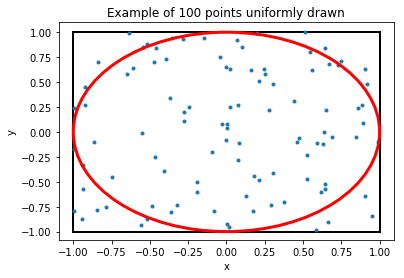


N = 100
Estimate of pi:
3.14368
Variance of estimates of pi:
0.0269688576
Mean of variance of estimated mean (m-hat) of each run:
0.026650272
Mean of variance of each run:
2.6650272
Mean of estimated variance of each run:
2.69194666667


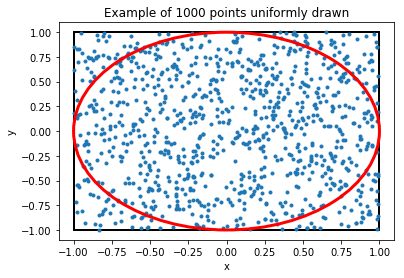


N = 1000
Estimate of pi:
3.137936
Variance of estimates of pi:
0.002510715904
Mean of variance of estimated mean (m-hat) of each run:
0.002702590944
Mean of variance of each run:
2.702590944
Mean of estimated variance of each run:
2.70529624024


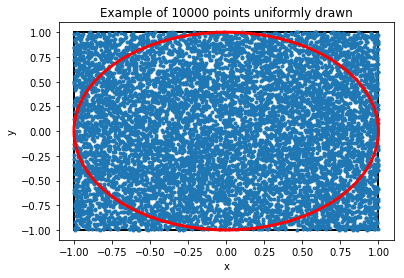


N = 10000
Estimate of pi:
3.1405308
Variance of estimates of pi:
0.00026342145136
Mean of variance of estimated mean (m-hat) of each run:
0.00026989260728
Mean of variance of each run:
2.6989260728
Mean of estimated variance of each run:
2.6991959924


In [2]:
from matplotlib.patches import Rectangle

N = [1e2, 1e3, 1e4]

runs = 1000

def plot_drawn():
    plt.figure()
    ax = plt.gca()
    circle = plt.Circle((0,0), 1, color="red", fill=False, zorder=5, lw=3)

    plt.plot(xx,yy, '.')
    plt.title("Example of " + str(n) + " points uniformly drawn")
    plt.xlabel("x")
    plt.ylabel("y")

    ax.add_artist(circle)
    ax.add_patch(Rectangle((-1,-1), 2, 2, lw=2, color="black", fill=False))
    plt.show()

for n in N:
    n = int(n)
    pis = np.zeros(runs)
    variances = np.zeros(runs)
    est_vars = np.zeros(runs)
    mean_vars = np.zeros(runs)
    
    for j in range(runs):
        S = np.zeros(n)
        xx = np.zeros(n)
        yy = np.zeros(n)
        
        for i in range(n):        
            x = np.random.uniform(-1,1)
            y = np.random.uniform(-1,1)
            xx[i] = x
            yy[i] = y
            
            if (x**2 + y**2) < 1:
                S[i] = 4
                
        pis[j] = np.mean(S)
        variances[j] = np.var(S)        
        est_vars[j] = 1 / (n - 1) * np.sum(S**2- (np.mean(S))**2 )
        mean_vars[j] = np.var(S) / n
        
    plot_drawn()
    
    print()
    print("N =", n)
    print("Estimate of pi:")
    print(np.mean(pis))
    print("Variance of estimates of pi:")
    print(np.var(pis))
    print("Mean of variance of estimated mean (m-hat) of each run:")
    print(np.mean(mean_vars))
    print("Mean of variance of each run:")
    print(np.mean(variances))
    print("Mean of estimated variance of each run:")
    print(np.mean(est_vars))
    

    plt.close("all")

Next we observe that the predicted and the empirical variances of the estimated mean are indeed close.

50


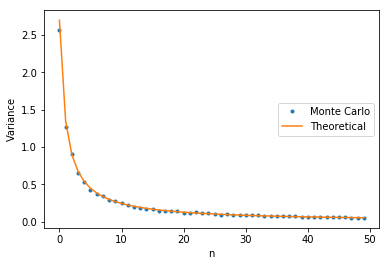

In [85]:
import random

n_estimat= 1000
n_m=0
pi=3.14159265359
th_var_v= 4*pi-pi*pi
th_var= []
var_emp=[]   
nmin=1
nmax=51
for n_trials in range (nmin,nmax): 
    s=0
    for j in range (n_estimat):
       # var_emp.append(j
        n_m+=1
        n_inside = 0
        for i in range(n_trials):
            x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
            if x**2 + y**2 < 1.0: 
                n_inside += 1
        m= 4.0 * n_inside / float(n_trials)
        s+= (m - pi)*(m-pi) 
    th_var.append(th_var_v/n_trials)
    s/= n_estimat
    var_emp.append(s)
plt.plot(range (50),var_emp, '.', label='Monte Carlo')
plt.plot(range (50),th_var, label = 'Theoretical')
plt.legend(loc='center right')
plt.xlabel('n')
plt.ylabel('Variance')
plt.show()
plt.close("all")

### Error bounds (Chernoff bound)

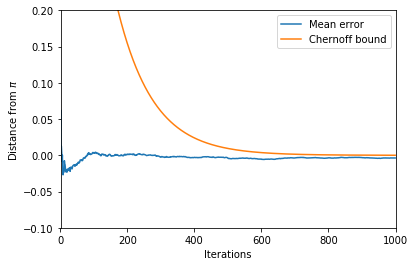

Number of mean errors below the Chernoff bound for N = 1000
1000


In [202]:
N = [5e2]

runs = 1000

lamb = 0.8
a = 0.01

for n in N:
    n = int(n)
    pis = np.zeros(runs)
    variances = np.zeros(runs)
    est_vars = np.zeros(runs)
    mean_vars = np.zeros(runs)
    errors = np.array([])
    mean_errors = np.zeros(runs)
    bounds = np.zeros(runs)
    
    for j in range(runs):
        S = np.zeros(n)
        xx = np.zeros(n)
        yy = np.zeros(n)
        
        for i in range(n):        
            x = np.random.uniform(-1,1)
            y = np.random.uniform(-1,1)
            xx[i] = x
            yy[i] = y
            
            if (x**2 + y**2) < 1:
                S[i] = 4
                
        pis[j] = np.mean(S)
        variances[j] = np.var(S)        
        est_vars[j] = 1 / (n - 1) * np.sum(S**2- (np.mean(S))**2 )
        mean_vars[j] = np.var(S) / n
        error = pis[j] - np.pi
        errors = np.append(errors, error)
        mean_errors[j] = np.mean(errors)
        
    
    mu = np.log(np.mean(np.exp(lamb * errors)))
    bounds = np.exp(- np.linspace(1,1000,1000) * (lamb * a - mu))
    
plt.plot(mean_errors, label="Mean error")
plt.plot(bounds, label="Chernoff bound")
plt.xlabel("Iterations")
plt.ylabel("Distance from " + r'$\pi$')
plt.ylim([-0.1,0.2])
plt.xlim([1,1000])
plt.legend()
plt.show()
plt.close("all")

print("Number of mean errors below the Chernoff bound for N =", runs)
print(np.sum(bounds > mean_errors))

## Problem 2

### 1

Derive Cauchy

__1) Find the probability density for the position X given the probability density of the angle of emittance. __

The lighthouse emits flashes distribution uniformly with respect to the angle $
\theta \in \left[-\frac{\pi}{2}, \frac{\pi}{2}\right] $.

The geometry of the problem is such that the position at which the pulses is intercepted at the coast is $x = \alpha + \beta \tan(\theta)$. We find the law according to which $x$ is distributed by using the trasformation law:
$$
P_X(x)dx = P_\Theta(\theta)d\theta \implies P_X(x) = P_\Theta(\theta) \frac{d\theta}{dx}
$$

We find:
$$
\frac{d\theta}{dx} = \frac{1}{\beta} \frac{1}{1+\left(\frac{x-\alpha}{\beta}
\right)^2}
$$

On the other hand $P_\Theta(\theta)$ is uniform and therefore $P_\Theta(\theta) = \frac{1}{\pi}$.

Putting it all together than we find:
$$
P_X(x) = P_\Theta(\theta) \frac{d\theta}{dx} =   \frac{1}{\pi \beta} \frac{1}{1+\left(\frac{x-\alpha}{\beta}
\right)^2}
$$

which is the Cauchy distribution.

### 2

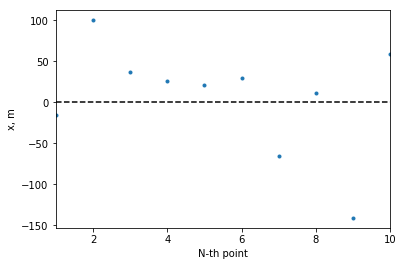

In [93]:
from scipy.stats import cauchy
import matplotlib.pyplot as plt
import numpy as np

alfa = 30
beta = 10
N = 10
xx = cauchy.rvs(loc=alfa, scale=beta, size=N)
#print(xx)
plt.figure()
plt.plot(range(1, N+1), xx ,'.')
plt.plot([1,11], [0,0], 'k--')
plt.xlim([0.99, 10.01])
plt.xlabel("N-th point")
plt.ylabel("x, m")
plt.show()
plt.close("all")

### 3

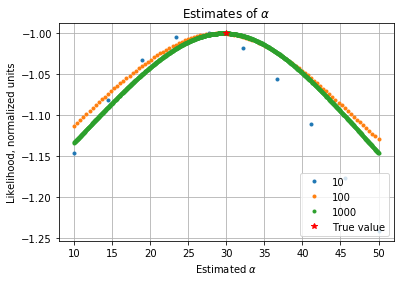

In [17]:
samples = [10, 100, 1000]
fig = plt.figure()

for n in samples:
    xx = cauchy.rvs(loc=alfa, scale=beta, size=n) 
    alfas = np.linspace(10, 50, n)
    likelihoods = np.zeros(len(alfas))
    
    for a in range(len(alfas)):
        total = np.sum(np.log(cauchy.pdf(xx, loc=alfas[a], scale=beta)))
        likelihoods[a] = total
    
    plt.title("Estimates of " + r'$\alpha$')
    plt.xlabel("Estimated " + r'$\alpha$')
    plt.ylabel("Likelihood, normalized units")    
    plt.plot(alfas, likelihoods/np.abs(np.max(likelihoods)), ".", label=n)
    
best_like = np.sum(np.log(cauchy.pdf(xx, loc=alfa, scale=beta)))
plt.plot(alfa, best_like / np.abs(np.max(best_like)), 'r*', label="True value")
plt.grid()
plt.legend(loc=4)
plt.show()
plt.close(fig)

### 4

The mean of Cauchy distribution is ill-defined / divergent, so it will not coincide with the value of $x$ giving peak PDF.

Numerical experiments confirm this; see below the evolution of the empirical mean.

The empirical mode, however, converges to the value that gives the peak of the probability distribution, which is zero for a symmetric Cauchy distribution.

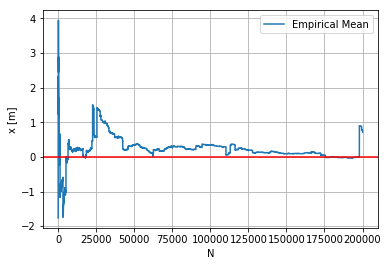

In [191]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.0
beta = 1.0
num_of_trials = 200000

x_max = []
x_avg = []
x_max_tmp = -1
x_avg_tmp = 0

for i in range(num_of_trials):
    s = beta*np.random.standard_cauchy(1)+alpha
    x_avg_tmp += s[0]
    if abs(s[0]) > abs(x_max_tmp):
        x_max_tmp = s[0]
    x_max.append(x_max_tmp)
    x_avg.append(x_avg_tmp/(i+1))

plt.plot(range(num_of_trials), x_avg, label='Empirical Mean')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='upper right')
plt.xlabel('N')
plt.ylabel('x [m]')
plt.grid()
plt.show()

plt.close("all")


## Problem 3

### 1


$ Z = e^{-1/\lambda} - e^{-20/\lambda}$, as can be obtained by normalizing the exponential distribution is this interval.

$P_{\lambda} (\{x\}) = \Pi_i^n \ P_\lambda (x_i)$, since the points drawn are independent from each other.

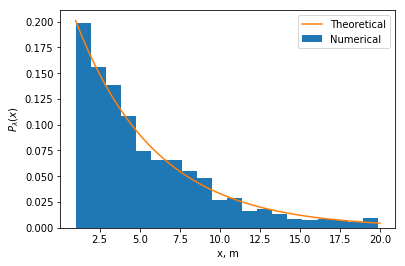

In [45]:
lower = 1 
upper = 20
lambda_ = 5
scale = lambda_
n = 1000

def pdf_single(scale):
    x = np.random.exponential(scale=scale)
    if x < 20 and x > 1:
        return x
    return pdf_single(scale)

def norm_pdf(lower, upper, scale, size):
    """ Draws $size points from the normalized distribution"""
    xx = np.zeros(size)
    for i in range(size):
        xx[i] = pdf_single(scale)
    return xx
        
xx = norm_pdf(lower, upper, lambda_, n)
fig = plt.figure()
plt.hist(xx, normed=True, bins=20, label="Numerical")
Z = lambda_ * np.exp(-lower/scale) - np.exp(-upper/scale)
plt.plot(np.linspace(1,20,50), np.exp(-np.linspace(1,20,50)/lambda_)/Z, label="Theoretical")

plt.xlabel("x, m")
plt.ylabel(r'$P_{\lambda}(x)$') # r'$\alpha$'
plt.legend()
plt.show()
plt.close(fig)

### 2

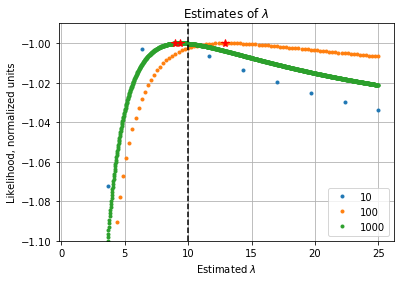

In [99]:
def pdf_x(x, lower, upper, scale):
    xx = np.zeros(len(x))
    Z = np.exp(-lower/scale) - np.exp(-upper/scale)
    for i in range(len(x)):
        if x[i] >= lower and x[i] <= upper:
            xx[i] = np.exp(-x[i]/scale) / Z / scale
        else:
            xx[i] = 0
    return xx

samples = [10, 100, 1000]
lambda_ = 10
for n in samples:
    xx = norm_pdf(lower, upper, lambda_, n)
    lambdas = np.linspace(1, 25, n)
    likelihoods = np.zeros(len(lambdas))
    
    for a in range(len(lambdas)):
        total = np.sum(np.log(pdf_x(xx, lower, upper, lambdas[a])))
        likelihoods[a] = total
    
    plt.title("Estimates of " + r'$\lambda$') ## + " with " + str(n) + " samples")
    plt.xlabel("Estimated " + r'$\lambda$')
    plt.ylabel("Likelihood, normalized units")    
    plt.ylim([-1.1, -0.99])
    plt.plot(lambdas, likelihoods/np.abs(np.max(likelihoods)), ".", label=n)
    
    best_lamb_ind = np.argmax(likelihoods)
    normed = likelihoods[best_lamb_ind]/np.abs(np.max(likelihoods))
    
    plt.plot(lambdas[best_lamb_ind], normed, 'r*', zorder=5, markersize=8)
    
    plt.grid()
    plt.legend(loc=4)
plt.plot([10,10], [-1.10, -0.99], "k--")
plt.show()
plt.close("all")

### 3

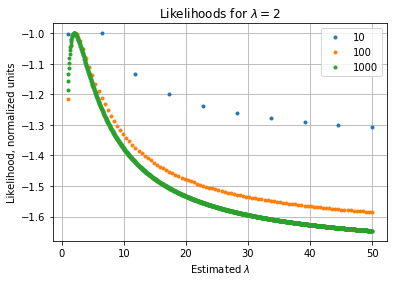

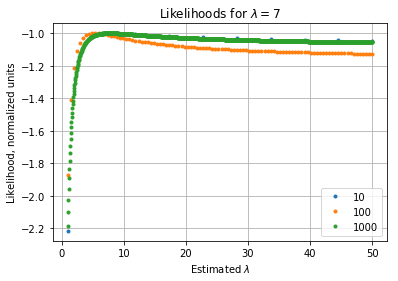

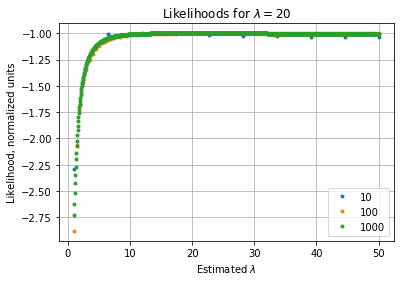

Estimates for lambda = 2
For # of samples: [10, 100, 1000]
[ 6.44444444  1.98989899  2.03003003]

Estimates for lambda = 7
For # of samples: [10, 100, 1000]
[ 6.44444444  5.45454545  7.76876877]

Estimates for lambda = 20
For # of samples: [10, 100, 1000]
[ 11.88888889  27.72727273  18.75575576]



In [205]:
samples = [10, 100, 1000]
lambda_s = [2, 7, 20]
max_likes = np.array([])

for lambda_ in lambda_s:
    max_like = np.zeros(len(samples))
    plt.figure()
    for n in samples:
        xx = norm_pdf(lower, upper, lambda_, n)
        lambdas = np.linspace(1, 50, n)
        likelihoods = np.zeros(len(lambdas))
        
        for a in range(len(lambdas)):
            total = np.sum(np.log(pdf_x(xx, lower, upper, lambdas[a])))
            likelihoods[a] = total
            
        index = samples.index(n)
        max_like[index] = lambdas[np.argmax(likelihoods)]
        plt.title("Likelihoods for " + r'$\lambda = $' + str(lambda_))
        plt.xlabel("Estimated " + r'$\lambda$')
        plt.ylabel("Likelihood, normalized units") 
        plt.plot(lambdas, likelihoods/np.abs(np.max(likelihoods)), ".", label=n)
        
    plt.legend()
    plt.grid()
    plt.show()
        
    max_likes = np.append(max_likes, max_like)
max_likes = np.reshape(max_likes, (len(lambda_s),len(samples)))

plt.close("all")

for i in range(len(lambda_s)):
    print("Estimates for lambda =", lambda_s[i])
    print("For # of samples:", samples)
    print(max_likes[i])
    print()

As we can see the estimates become more accurate for more samples.

### 4

First we analyzed the maximum likelihoods for $\hat \lambda = 10$ and determined the distribution of the estimators and their errors.

The mean squared error is 1.8242806801586207 .


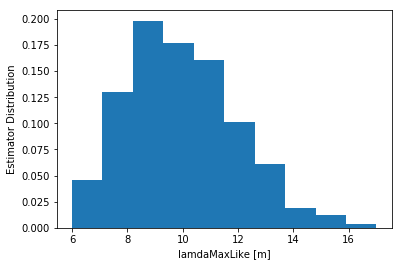

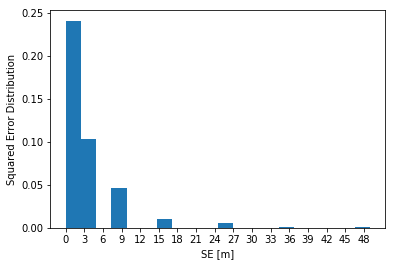

In [193]:
from math import exp
from math import log
from math import sqrt

import numpy as np
import matplotlib.pyplot as plt

import random

def rand_exp_krz(lamda, xmin, xmax):
    x = random.expovariate(1/lamda)
    while (x <= xmin or x >= xmax):
        x = random.expovariate(1/lamda)
    return x

num_of_trials = 1000
lamda_true = 10
xmin = 1
xmax = 20

lamda_estimator = []
squared_error = []
max_like = []

for k in range(1000):
    for lamda in range(2, 19):  
        max_like_tmp = 0
        sum_x = 0
        for i in range(num_of_trials):
            x = rand_exp_krz(lamda_true, xmin, xmax) 
            sum_x += x
        
        z = lamda*(exp(-xmin/lamda)-exp(-xmax/lamda))  
        max_like_tmp = -sum_x/lamda -num_of_trials*log(z) #use logarithms
        max_like.append(max_like_tmp)
    
    lamda_estimator.append(max_like.index(max(max_like)) + 2) 
    squared_error.append((max_like.index(max(max_like)) + 2 - lamda_true)**2)
    del max_like[:]
    
print('The mean squared error is', sqrt(np.mean(squared_error)), '.')    

plt.hist(lamda_estimator, normed=True, bins=10)
plt.xlabel('lamdaMaxLike [m]')
plt.ylabel('Estimator Distribution')
plt.show()   

plt.hist(squared_error, normed=True, bins=20)
plt.xticks(np.arange(0, max(squared_error)+1, 3.0))
plt.xlabel('SE [m]')
plt.ylabel('Squared Error Distribution')
plt.show()

We can observe that the estimators cluster around the true $\lambda = 10$.

Next we explore the how the true $\lambda$ affects Fischer's information. The higher the information, the better the maximum likelihood method performs:

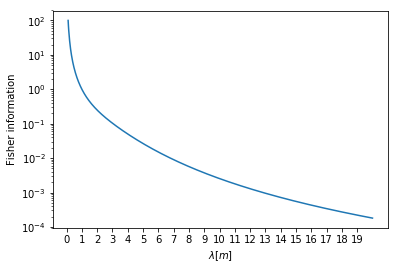

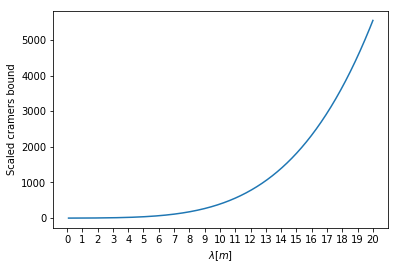

In [206]:
from math import log
from math import exp

xmin = 1
xmax = 20

import numpy as np
import matplotlib.pyplot as plt

def log_z(xmin, xmax, lamda):
    return log(lamda*(exp(-xmin/lamda)-exp(-xmax/lamda)))

def fisher_information(xmin, xmax, lamda):
    eps = 0.0001*lamda
    mean = (log_z(xmin, xmax, lamda+eps)-log_z(xmin, xmax, lamda))/eps
    mean = lamda*lamda*mean
    dd_logz = (log_z(xmin, xmax, lamda+2*eps) - 2*log_z(xmin, xmax, lamda+eps) + log_z(xmin, xmax, lamda))/(eps*eps)       
    return dd_logz + 2*mean/(lamda*lamda*lamda)

fisher = []
cramers_bound = []
x = np.linspace(0.1, 20, 1000)
for i in range(1000):
    fisher.append(fisher_information(xmin, xmax, x[i]))
    cramers_bound.append(1/fisher_information(xmin, xmax, x[i]))
    
plt.semilogy(x, fisher)
plt.xticks(np.arange(0, 20, 1))
plt.xlabel(r'$\lambda [m]$')
plt.ylabel('Fisher information')
plt.show()

plt.plot(x, cramers_bound)
plt.xticks(np.arange(0, 21, 1))
plt.xlabel(r'$\lambda [m]$')
plt.ylabel('Scaled cramers bound')
plt.show()

plt.close("all")

Here we show that the $MSE(\lambda, \hat \lambda)$ is always above the Cramers-Rao bound, as it should because:
$MSE(\lambda, \hat \lambda) \geq \frac{1}{N\ I_F}$.

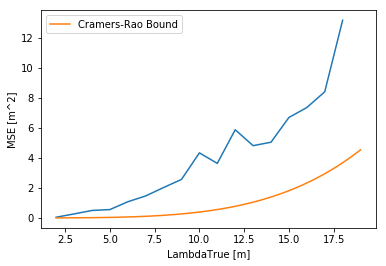

In [201]:
from math import exp
from math import log
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

def prob_exp_krz(lamda, xmin, xmax, x):
    z = lamda*(exp(-xmin/lamda)-exp(-xmax/lamda))  
    return exp(-x/lamda)/z

num_of_trials = 1000
num_of_samples = 100
xmin = 1
xmax = 20

mean_squared_error = []
log_like = []

for lamda_true in range(2, 19):
    mean_squared_error_tmp = 0    
    z = lamda*(exp(-xmin/lamda)-exp(-xmax/lamda)) 
    
    for k in range(num_of_samples):
        
        for lamda in range(2, 19): 
            log_like_tmp = 0
            sum_x = 0
            for i in range(num_of_trials):
                x = rand_exp_krz(lamda_true, xmin, xmax)
                log_like_tmp+=log(prob_exp_krz(lamda, xmin, xmax, x)) 
         
            log_like.append(log_like_tmp)
    
        max_like_estimate = log_like.index(max(log_like)) + 2
        mean_squared_error_tmp += (max_like_estimate - lamda_true)**2
        del log_like[:]
        
    mean_squared_error_tmp/=num_of_samples 
    mean_squared_error.append(mean_squared_error_tmp)

    
cramers_bound = []
lam = np.linspace(2, 19, 1000)
for i in range(1000):
    cramers_bound.append(1/(num_of_trials*fisher_information(xmin, xmax, lam[i])))
    
plt.plot(range(2, 19), mean_squared_error)
plt.plot(lam, cramers_bound, label='Cramers-Rao Bound')
plt.legend(loc='upper left')
plt.xlabel('LambdaTrue [m]')
plt.ylabel('MSE [m^2]')
plt.show()    

The plot shows that the variance is indeed bounded from below by the Cramers-Rao bound, but admittedly the curve is rather noisy. This noise might be reduced by increasing the number of points per sample. We tried increasing the sample sizes, but due to our finite computational abilities and/or cognitive abilities the code seemed to be extremely time consuming.

:)